In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('uncleaned_dataset.csv', sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [3]:
#rename the columns to remove spaces
data.columns = [
  "marital_status", 
  "application_mode", 
  "application_order", 
  "course", 
  "daytime_evening_attendance", 
  "previous_qualif", 
  "previous_qualif_grade", 
  "nationality", 
  "mother_qualif", 
  "father_qualif", 
  "mother_occ", 
  "father_occ", 
  "admission_grade", 
  "displaced", 
  "educational_special_needs", 
  "debtor", 
  "tuition_fees_up_to_date", 
  "gender", 
  "scholarship", 
  "age_at_enrollment", 
  "international", 
  "units_1_credited", 
  "units_1_enrolled", 
  "units_1_evaluations", 
  "units_1_approved", 
  "units_1_grade", 
  "units_1_no_evaluations", 
  "units_2_credited", 
  "units_2_enrolled", 
  "units_2_evaluations", 
  "units_2_approved", 
  "units_2_grade", 
  "units_2_no_evaluations", 
  "unemployment_rate", 
  "inflation_rate", 
  "gdp", 
  "target"
]

#checking for null values
data.isnull().sum()

marital_status                0
application_mode              0
application_order             0
course                        0
daytime_evening_attendance    0
previous_qualif               0
previous_qualif_grade         0
nationality                   0
mother_qualif                 0
father_qualif                 0
mother_occ                    0
father_occ                    0
admission_grade               0
displaced                     0
educational_special_needs     0
debtor                        0
tuition_fees_up_to_date       0
gender                        0
scholarship                   0
age_at_enrollment             0
international                 0
units_1_credited              0
units_1_enrolled              0
units_1_evaluations           0
units_1_approved              0
units_1_grade                 0
units_1_no_evaluations        0
units_2_credited              0
units_2_enrolled              0
units_2_evaluations           0
units_2_approved              0
units_2_

In [4]:
#independent variables
features = data.drop("target", axis = 1)

#dependent target variable
target = data["target"] # target is descrete - classification

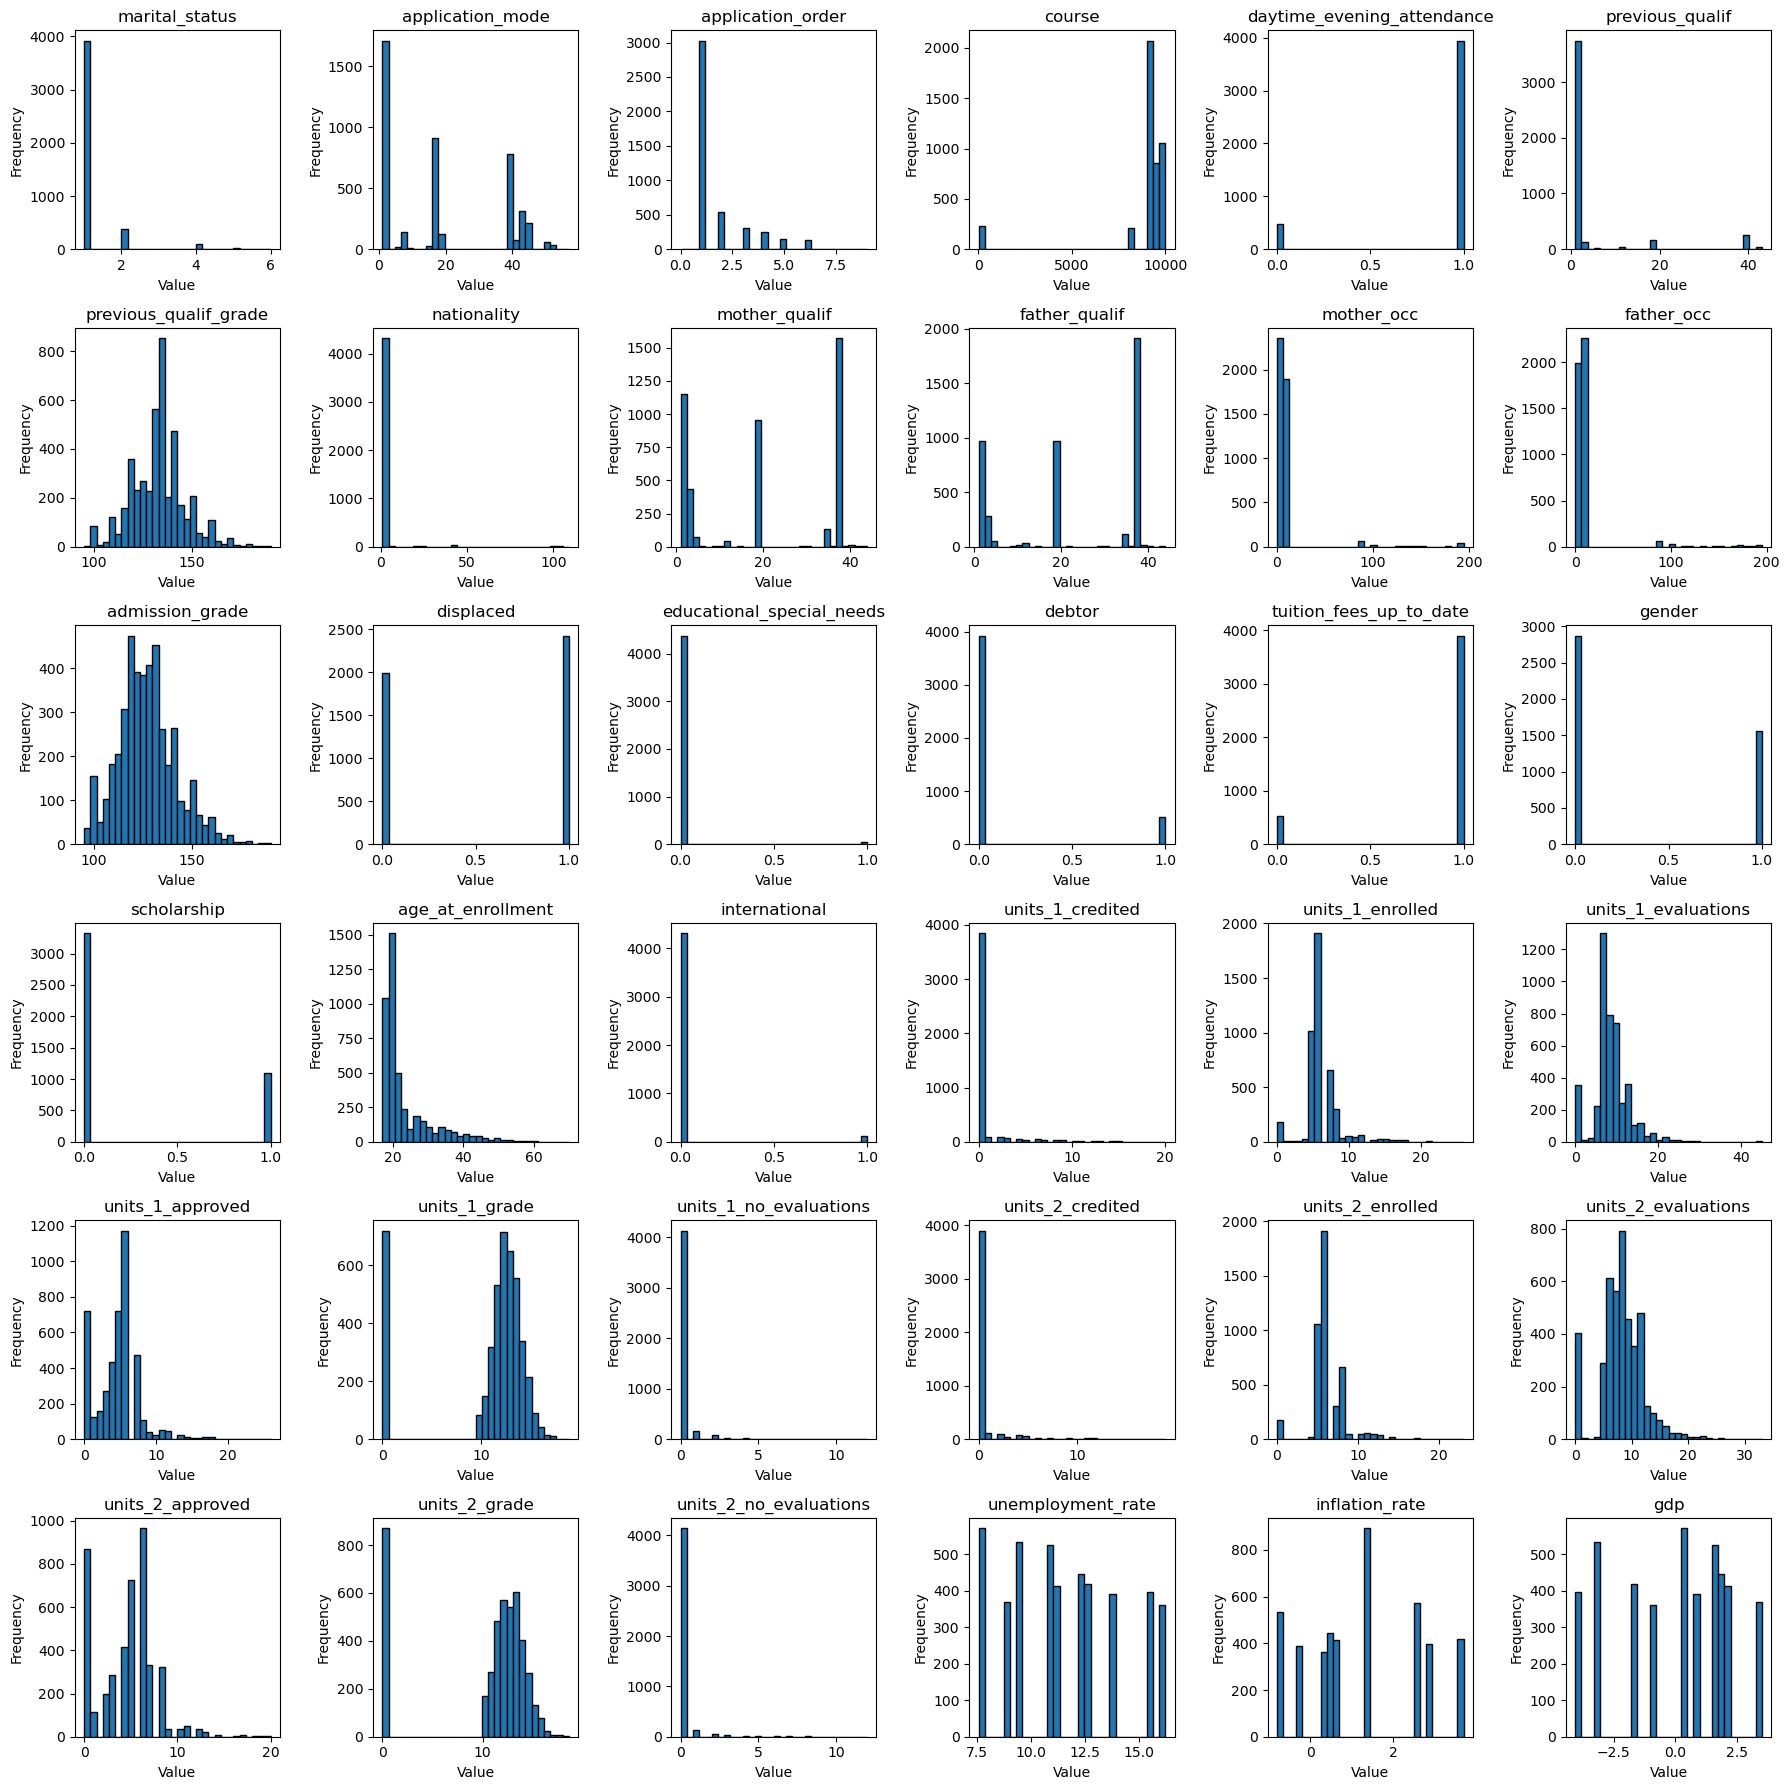

In [5]:
# Plotting the dependent variables as histograms to ensure discrete or continuous
fig, axes = plt.subplots(6, 6, figsize=(18, 18))
axes = axes.flatten() # Flatten axes array for easy iteration

for ax, column in zip(axes, features.columns):
  ax.hist(features[column], bins=30, edgecolor='black')
  ax.set_title(column)
  ax.set_xlabel('Value')
  ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

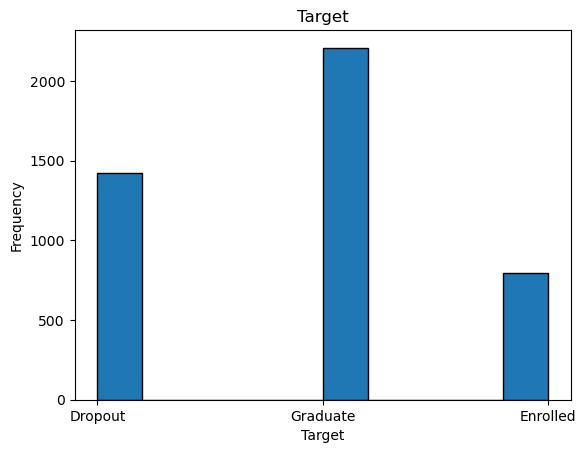

In [6]:
#Target distribution
plt.hist(target, edgecolor='black')
plt.title('Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

Mutual information feature selection - for redundant features


Calculate the mutual information score on all the 36 input variables.


In [7]:
#see if x is descrete or continuous
discrete_features = features.dtypes == "int64" 

#mapping each variable onto the discrete status 
features_discrete_map = dict(zip(features, discrete_features))

Mutual Information scores calculation with the target variable - to be used when removing some redundant variables


In [8]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Function to calculate mutual information scores with target vector
def make_mi_scores(X, y, discrete_features_dict):
    # Extract a list of discrete statuses for the features in X
    discrete_features_list = [discrete_features_dict[feature] for feature in X.columns]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features_list, random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#calculate the MI scores to the target variables
target_mi_scores = make_mi_scores(features, target, features_discrete_map)

Find the pairwise MI scores between features to eliminate redundant variables


In [9]:
#define the function to calculate the pairwise MI scores
def pairwise_mi(df, discrete_features):
    n = df.shape[1]
    mi_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            #start with equal pairs and mark is not applicable
            if i == j:
                mi_matrix[i, j] = np.nan
            else:
                x = df.iloc[:, i]
                y = df.iloc[:, j]
                
                #first case: if both variables are discrete
                if discrete_features.iloc[i] and discrete_features.iloc[j]:
                    mi = mutual_info_classif(x.values.reshape(-1, 1), y.values, discrete_features=True, random_state=42)[0]
                #now if both variables are continuous
                elif not discrete_features.iloc[i] and not discrete_features.iloc[j]:
                    mi = mutual_info_regression(x.values.reshape(-1, 1), y.values, discrete_features=False, random_state=42)[0]
                #now one is continuous and another is discrete- prefer to take a regression case than a classification case, leaving descrete_feature as auto in this case
                else:
                    mi = mutual_info_regression(x.values.reshape(-1, 1), y.values, random_state=42)[0]
                
                mi_matrix[i, j] = mi
    return pd.DataFrame(mi_matrix, index=df.columns, columns=df.columns)


#generate pairwise MI matrix on all the features first
mi_matrix = pairwise_mi(features, discrete_features)

Normalising the MI matrix scores


In [10]:
from sklearn import preprocessing

#normalise it
min_max_scaler = preprocessing.MinMaxScaler()

mi_matrix_scaled = min_max_scaler.fit_transform(mi_matrix)
mi_matrix_scaled

mi_matrix_scaled_df = pd.DataFrame(mi_matrix_scaled, columns=mi_matrix.columns, index=mi_matrix.index)
mi_matrix_scaled_df.head()

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualif,previous_qualif_grade,nationality,mother_qualif,father_qualif,...,units_1_no_evaluations,units_2_credited,units_2_enrolled,units_2_evaluations,units_2_approved,units_2_grade,units_2_no_evaluations,unemployment_rate,inflation_rate,gdp
marital_status,NaN,0.223802,0.171055,0.057682,0.133696,0.098702,0.085445,0.022352,0.123392,0.091276,...,0.056463,0.021303,0.015723,0.016371,0.012813,0.000000,0.083328,0.000000,0.000000,0.002914
application_mode,0.593978,NaN,1.000000,0.234774,0.226889,1.000000,0.362019,0.442477,0.209051,0.195278,...,0.280208,0.373338,0.115492,0.142476,0.118425,0.040909,0.270686,0.046209,0.038599,0.045748
application_order,0.114444,0.252579,NaN,0.091022,0.066321,0.119688,0.065753,0.085828,0.050827,0.053013,...,0.095099,0.082954,0.032844,0.047237,0.037914,0.021462,0.057473,0.005505,0.002051,0.003036
course,0.305023,0.446260,0.700510,NaN,1.000000,0.237318,0.168699,0.238048,0.225413,0.213199,...,0.853064,0.228254,0.732522,0.511425,0.445343,0.272884,0.644143,0.030041,0.021159,0.027188
daytime_evening_attendance,0.237280,0.150436,0.176017,0.356959,NaN,0.033473,0.042619,0.011455,0.080134,0.066364,...,0.042462,0.031430,0.029110,0.012045,0.008627,0.000000,0.008533,0.006400,0.004747,0.004812


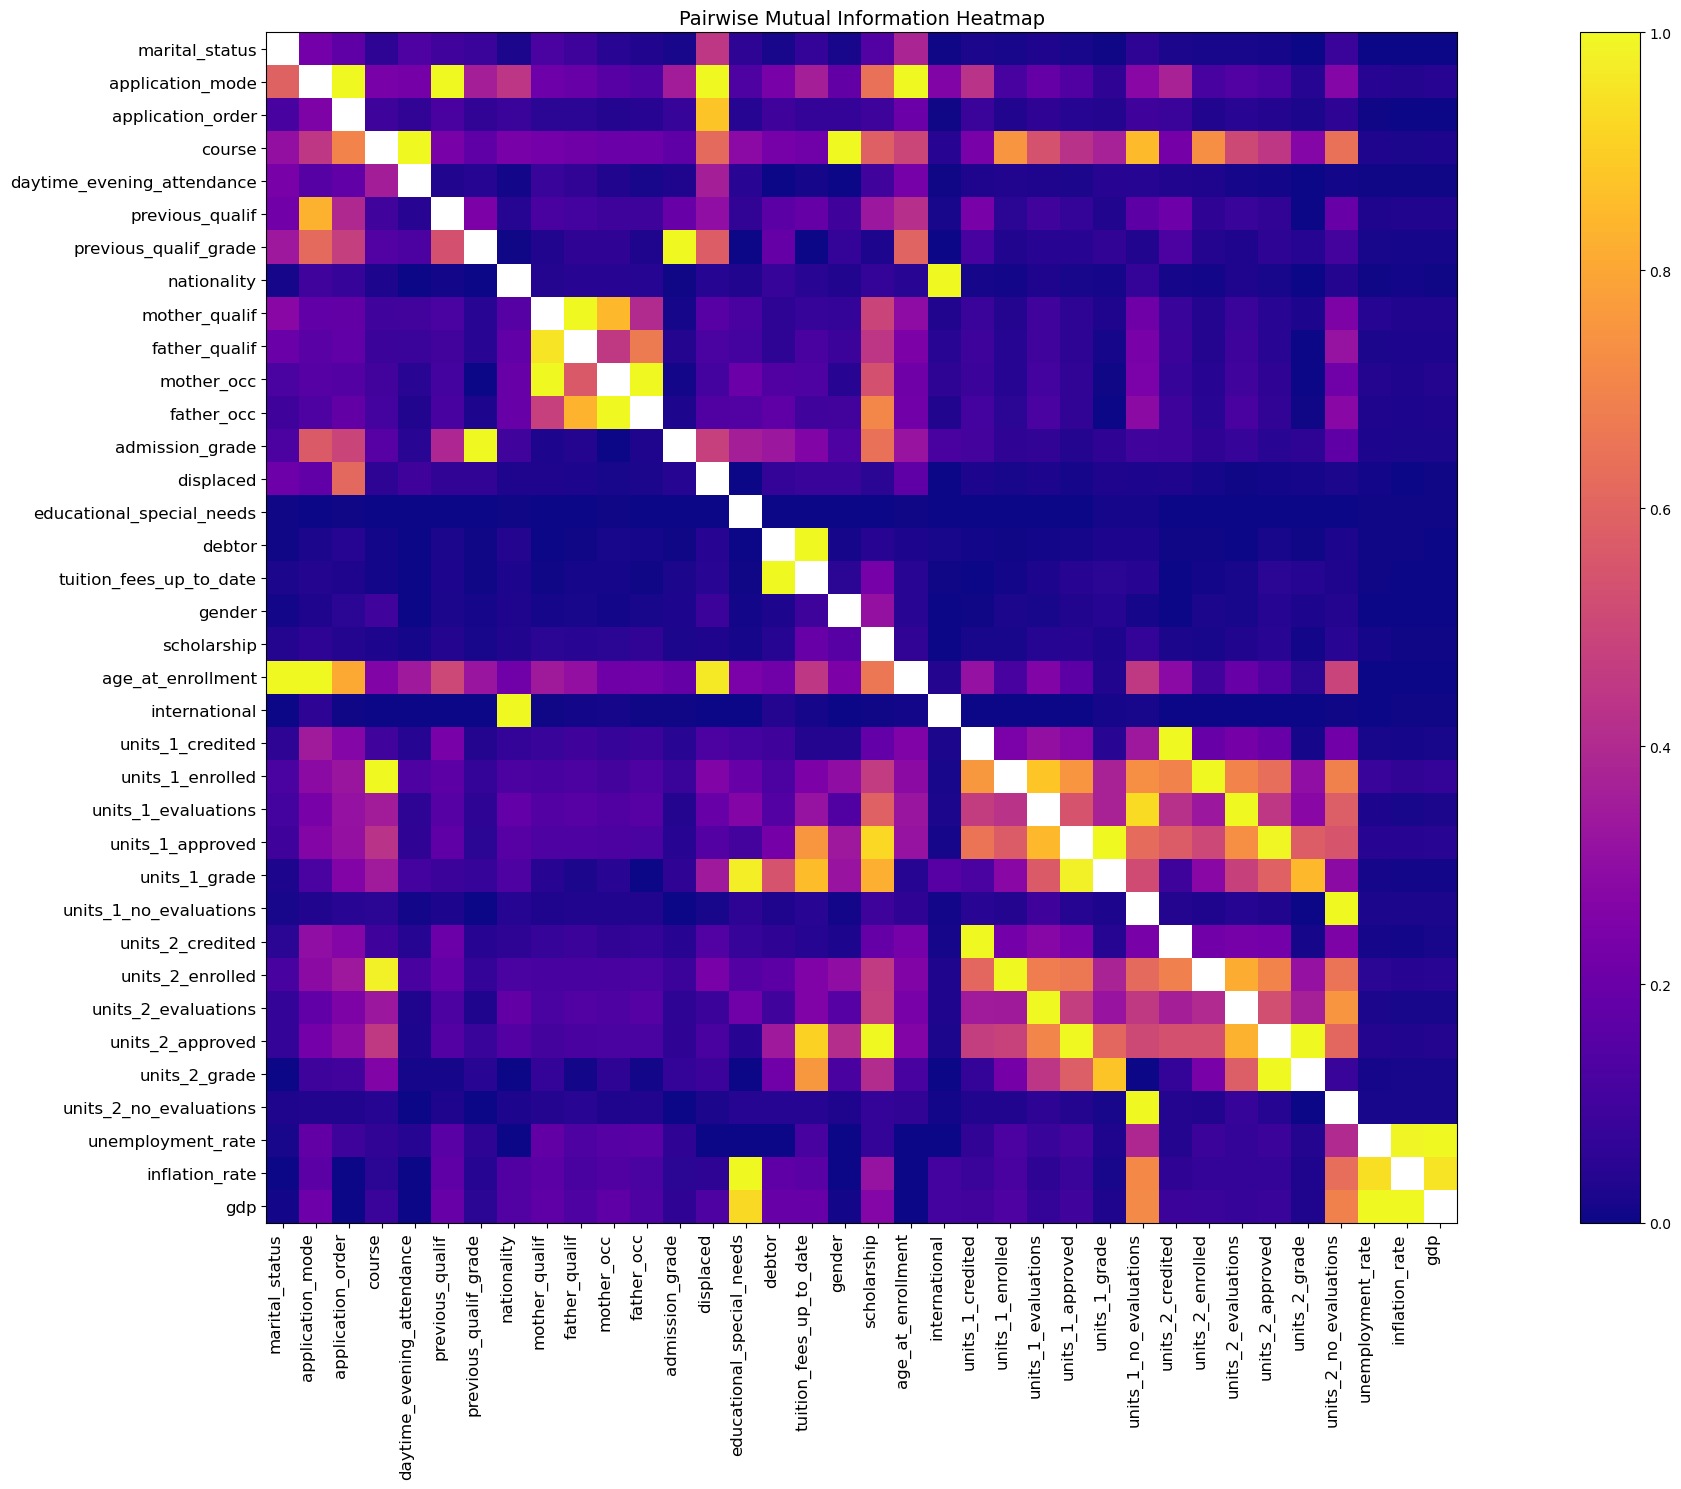

In [11]:
#plotting the pairwise mi scores to visualise in a heatmap
plt.figure(figsize=(25, 15))
plt.imshow(mi_matrix_scaled, cmap="plasma", interpolation="nearest", origin="upper")

labels = mi_matrix_scaled_df.columns

plt.colorbar()
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=90, ha="right", fontsize=12)
plt.yticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)
plt.title("Pairwise Mutual Information Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
# Flatten the pairwise MI matrix to sort by scores
pairwise_mi_scores = (
    mi_matrix_scaled_df.where(np.triu(np.ones(mi_matrix_scaled_df.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

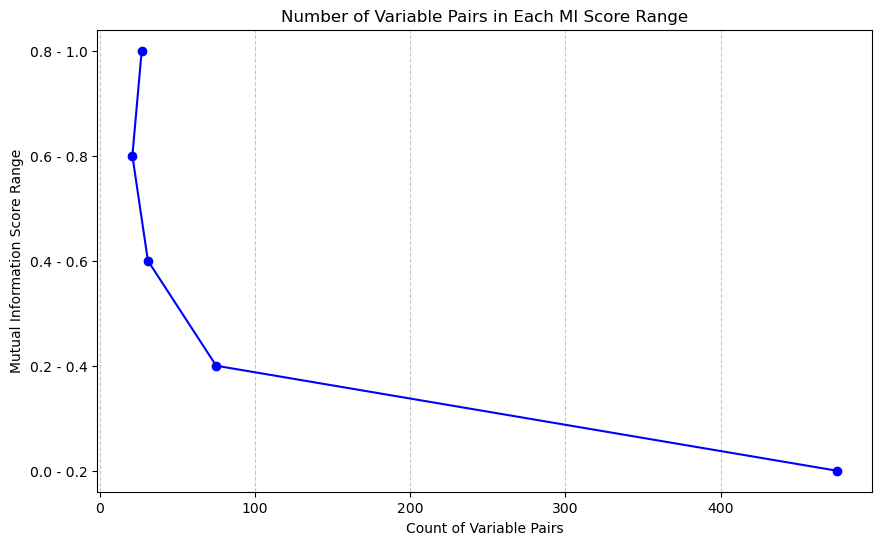

In [13]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Group scores into ranges
ranges = defaultdict(int)  # Use an integer to count pairs in each range
for (pair, score) in pairwise_mi_scores.items():
    if 0.0 <= score < 0.2:
        ranges["0.0 - 0.2"] += 1
    elif 0.2 <= score < 0.4:
        ranges["0.2 - 0.4"] += 1
    elif 0.4 <= score < 0.6:
        ranges["0.4 - 0.6"] += 1
    elif 0.6 <= score < 0.8:
        ranges["0.6 - 0.8"] += 1
    elif 0.8 <= score <= 1.0:
        ranges["0.8 - 1.0"] += 1

# Prepare data for the plot
range_labels = list(ranges.keys())[::-1]  # Reverse order for proper y-axis alignment
pair_counts = list(ranges.values())[::-1]

# Create the horizontal line plot
plt.figure(figsize=(10, 6))
plt.plot(pair_counts, range_labels, marker='o', linestyle='-', color='blue')
plt.title("Number of Variable Pairs in Each MI Score Range")
plt.ylabel("Mutual Information Score Range")
plt.xlabel("Count of Variable Pairs")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Setting a threshold for pairwise redundancy based on the plot above


In [14]:
mi_threshold_pairwise = 0.99

Check the pairwise scores and remove one of the redundant variables based on the lowest MI score with the target variable


In [15]:
from tabulate import tabulate

# Initialize non_redundant_features with all feature names
non_redundant_features = features.columns.to_list()

# Initialize a list to keep track of features to drop
features_to_drop = []

# Check pairwise MI between all features
for i in range(len(non_redundant_features)):
    for j in range(i + 1, len(non_redundant_features)):
        feature_i = non_redundant_features[i]
        feature_j = non_redundant_features[j]
        
        # Get the pairwise MI value
        mi_value = mi_matrix_scaled_df.loc[feature_i, feature_j]
        
        if mi_value > mi_threshold_pairwise:
            # Compare target MI scores for both features
            if target_mi_scores[feature_i] < target_mi_scores[feature_j]:
                # Drop feature_i if its MI with the target is lower
                features_to_drop.append(feature_i)
            else:
                # Drop feature_j if its MI with the target is lower
                features_to_drop.append(feature_j)

# Remove duplicates from features_to_drop
features_to_drop = list(set(features_to_drop))

# Retain only the non-redundant features
final_features_p1 = [feature for feature in non_redundant_features if feature not in features_to_drop]

# Prepare data for tabulate
data_features = [[feature] for feature in final_features_p1]
headers = ["Selected Features"]
print(tabulate(data_features, headers=headers, tablefmt="fancy_grid"))
print(f"Total number of selected features: {len(final_features_p1)}")

╒═══════════════════════════╕
│ Selected Features         │
╞═══════════════════════════╡
│ marital_status            │
├───────────────────────────┤
│ course                    │
├───────────────────────────┤
│ nationality               │
├───────────────────────────┤
│ father_qualif             │
├───────────────────────────┤
│ mother_occ                │
├───────────────────────────┤
│ admission_grade           │
├───────────────────────────┤
│ educational_special_needs │
├───────────────────────────┤
│ tuition_fees_up_to_date   │
├───────────────────────────┤
│ scholarship               │
├───────────────────────────┤
│ age_at_enrollment         │
├───────────────────────────┤
│ units_1_credited          │
├───────────────────────────┤
│ units_2_enrolled          │
├───────────────────────────┤
│ units_2_evaluations       │
├───────────────────────────┤
│ units_2_approved          │
├───────────────────────────┤
│ units_2_no_evaluations    │
├───────────────────────────┤
│ unemploy

In [16]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import pandas as pd

# Step 1: Calculate Mutual Information Scores
mi_scores = mutual_info_classif(features, np.ravel(target), random_state=42)

# Create a DataFrame to rank features by mutual information
mi_scores_df = pd.DataFrame({
    'Feature': features.columns,
    'Mutual Information': np.round(mi_scores*100, 3)
}).sort_values(by='Mutual Information', ascending=False)

In [17]:
mi_matrix_scaled_df

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualif,previous_qualif_grade,nationality,mother_qualif,father_qualif,...,units_1_no_evaluations,units_2_credited,units_2_enrolled,units_2_evaluations,units_2_approved,units_2_grade,units_2_no_evaluations,unemployment_rate,inflation_rate,gdp
marital_status,NaN,0.223802,0.171055,0.057682,0.133696,0.098702,0.085445,0.022352,0.123392,0.091276,...,0.056463,0.021303,0.015723,0.016371,0.012813,0.000000,0.083328,0.000000,0.000000,0.002914
application_mode,0.593978,NaN,1.000000,0.234774,0.226889,1.000000,0.362019,0.442477,0.209051,0.195278,...,0.280208,0.373338,0.115492,0.142476,0.118425,0.040909,0.270686,0.046209,0.038599,0.045748
application_order,0.114444,0.252579,NaN,0.091022,0.066321,0.119688,0.065753,0.085828,0.050827,0.053013,...,0.095099,0.082954,0.032844,0.047237,0.037914,0.021462,0.057473,0.005505,0.002051,0.003036
course,0.305023,0.446260,0.700510,NaN,1.000000,0.237318,0.168699,0.238048,0.225413,0.213199,...,0.853064,0.228254,0.732522,0.511425,0.445343,0.272884,0.644143,0.030041,0.021159,0.027188
daytime_evening_attendance,0.237280,0.150436,0.176017,0.356959,NaN,0.033473,0.042619,0.011455,0.080134,0.066364,...,0.042462,0.031430,0.029110,0.012045,0.008627,0.000000,0.008533,0.006400,0.004747,0.004812
previous_qualif,0.218915,0.828975,0.395197,0.101354,0.043635,NaN,0.247239,0.042456,0.118815,0.107391,...,0.167075,0.210750,0.060004,0.081834,0.062947,0.002239,0.198391,0.029453,0.032226,0.034583
previous_qualif_grade,0.337810,0.619514,0.476413,0.143960,0.127830,0.537026,NaN,0.006198,0.031627,0.058771,...,0.031673,0.128534,0.035767,0.027664,0.057218,0.041047,0.111562,0.017216,0.013330,0.014881
nationality,0.013388,0.097698,0.076836,0.024587,0.003803,0.009443,0.000000,NaN,0.036759,0.046435,...,0.070580,0.013162,0.009529,0.028676,0.016726,0.000000,0.038469,0.004245,0.007897,0.007682
mother_qualif,0.281402,0.176481,0.181121,0.098762,0.104725,0.122868,0.050648,0.150459,NaN,1.000000,...,0.214402,0.080365,0.037836,0.082532,0.049321,0.026643,0.253767,0.039779,0.032858,0.033471
father_qualif,0.199760,0.156349,0.178554,0.088365,0.083073,0.105468,0.048020,0.176401,0.950130,NaN,...,0.235703,0.086635,0.036439,0.089939,0.050609,0.000000,0.320156,0.022566,0.024814,0.025624


In [18]:
selected_predictors = data[final_features_p1]

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the final features using MinMaxScaler
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(selected_predictors)
df_final_minmax = pd.DataFrame(X_minmax, columns=selected_predictors.columns)
df_final_minmax.head()

,marital_status,course,nationality,father_qualif,mother_occ,admission_grade,educational_special_needs,tuition_fees_up_to_date,scholarship,age_at_enrollment,units_1_credited,units_2_enrolled,units_2_evaluations,units_2_approved,units_2_no_evaluations,unemployment_rate,inflation_rate
0,0.0,0.013858,0.0,0.255814,0.025773,0.340000,0.0,1.0,0.0,0.056604,0.0,0.00000,0.000000,0.00,0.0,0.372093,0.488889
1,0.0,0.925989,0.0,0.046512,0.015464,0.500000,0.0,0.0,0.0,0.037736,0.0,0.26087,0.181818,0.30,0.0,0.732558,0.111111
2,0.0,0.907512,0.0,0.837209,0.046392,0.313684,0.0,0.0,0.0,0.037736,0.0,0.26087,0.000000,0.00,0.0,0.372093,0.488889
3,0.0,0.978108,0.0,0.837209,0.025773,0.258947,0.0,1.0,0.0,0.056604,0.0,0.26087,0.303030,0.25,0.0,0.209302,0.000000
4,0.2,0.801466,0.0,0.860465,0.046392,0.489474,0.0,1.0,0.0,0.528302,0.0,0.26087,0.181818,0.30,0.0,0.732558,0.111111


In [20]:
pca = PCA()
pca_components = pca.fit(df_final_minmax)
cum_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_pcs = np.argmax(cum_variance >= 0.90) + 1
print(f"Number of PCs to explain 90% variance: {optimal_pcs}")

Number of PCs to explain 90% variance: 9


In [21]:
# Apply PCA to reduce to the optimal number of components
pca = PCA(n_components=optimal_pcs)
X_pca = pca.fit_transform(df_final_minmax)

# Create a DataFrame for PCA-transformed features
df_pca_transformed = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(optimal_pcs)])
df_pca_transformed['Target'] = data['target']

# Display the transformed dataset
df_pca_transformed.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Target
0,-0.299873,-0.214944,-0.080469,0.179122,0.024284,0.932123,0.152756,0.020619,-0.145530,Dropout
1,-0.472005,-0.333525,0.907935,-0.033884,-0.077476,-0.130438,0.083525,-0.191366,0.161605,Graduate
2,-0.377980,0.567188,0.707070,0.115344,0.083510,0.061709,-0.141297,-0.190129,0.031253,Dropout
3,-0.134040,0.279213,-0.157765,0.025263,-0.576767,-0.075713,-0.077658,-0.113742,-0.055928,Graduate
4,-0.133218,0.233277,-0.038659,-0.475110,-0.379986,0.102401,0.115889,0.314580,0.174563,Graduate
5,-0.138585,0.197889,-0.008429,-0.722131,-0.200446,-0.160049,0.013528,0.416546,-0.078125,Graduate
6,0.852613,0.149856,0.008044,-0.405025,0.402074,-0.047392,0.016570,-0.113685,0.006130,Graduate
7,-0.359838,0.493146,0.755271,-0.364168,0.482945,0.030137,-0.161497,-0.147411,-0.099806,Dropout
8,0.686499,-0.746817,0.272307,-0.251737,0.045516,-0.023144,-0.037342,0.064442,0.017231,Graduate
9,-0.461631,0.241158,0.667519,0.418615,0.107082,-0.157575,0.025568,-0.195576,-0.034417,Dropout


In [22]:
# # Convert the filtered features list into a DataFrame
# filtered_features_df = features[final_features_p1]

# # Identify the discrete status for the filtered features
# filtered_features_discrete_status = {feature: features_discrete_map[feature] for feature in final_features_p1}

In [23]:
# # Call the function with the correct discrete status list
# mi_scores = make_mi_scores(filtered_features_df, target, filtered_features_discrete_status)

# print("\nMutual Information Scores:")
# print(mi_scores)

<!-- Normalise the MI scores -->


In [24]:
# mi_scores_df = mi_scores.to_frame() # converts from pandas object to df
# mi_scores_scaled = min_max_scaler.fit_transform(mi_scores_df)
# mi_scores_scaled

# values = mi_scores_scaled.flatten()
# indices = mi_scores.index

# mi_scores_df = pd.DataFrame(values, index=indices, columns=["Values"])
# mi_scores_df

In [25]:
# # Plot the bar chart
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.barh(indices, values, color='skyblue')  # Bar chart with sky blue color

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Bar Chart of Normalized Values')

# # Show the plot
# plt.show()

In [26]:
# # Select relevant features based on MI scores greater than the threshold
# mi_threshold_target = 0.02
# relevant_features = mi_scores_df[mi_scores_df['Values'] > mi_threshold_target].index.tolist()

# # Display the selected relevant features
# print(f"Relevant features based on target MI (threshold = {mi_threshold_target}): {relevant_features}")

# # Create a DataFrame with only the relevant features
# relevant_features_df = features[relevant_features]
# len(relevant_features)